# Homework-3

**Waheeb Algabri, Joe Garcia, Lwin Shwe, Mikhail Broomes**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy import stats
import itertools
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


## Homework 3 - Logistic Regression

### Analysis of Factors that Influence Crime Rates:

In this homework assignment, we'll delve into examining, dissecting, and modeling a dataset that provides insights into crime across different neighborhoods within a bustling metropolis. Each entry in the dataset includes a variable denoting whether the crime rate exceeds the median value `(1)` or falls below it `(0)`
Our goal is to construct a binary logistic regression model using the training dataset. This model aims to forecast whether a neighborhood is prone to experiencing elevated levels of crime.
Here's a brief rundown of the key variables in the dataset:



|Column|Description|
|--|--|
|`zn`|proportion of residential land zoned for large lots (over 25000 square feet) (*predictor variable*)|
|`indus`|proportion of non-retail business acres per suburb (*predictor variable*)|
|`chas`|a dummy var. for whether the suburb borders the Charles River (1) or not (0) (*predictor variable*)|
|`nox`|nitrogen oxides concentration (parts per 10 million) (*predictor variable*)|
|`rm`|average number of rooms per dwelling (*predictor variable*)|
|`age`|proportion of owner-occupied units built prior to 1940 (*predictor variable*)
|`dis`|weighted mean of distances to five Boston employment centers (*predictor variable*)
|`rad`|index of accessibility to radial highways (**predictor variable**)
|`tax`|full value property tax rate per $10,000 (**predictor variable**)
|`Ptratio`|pupil teacher ratio by town (**predictor variable**)
|`lstat`|lower status of the population (percent) (*predictor variable*)

|`medv`|median value of owner-occupied homes in $1000s (*predictor variable*)

|**`target`**|**whether the crime rate is above the median crime rate (1) or not (0) (*response variable*)**|


In [2]:
# Load training and test data
train_df = pd.read_csv("https://raw.githubusercontent.com/waheeb123/Data-621/main/Homeworks/Homework-3/crime-training-data")
test_df = pd.read_csv("https://raw.githubusercontent.com/waheeb123/Data-621/main/Homeworks/Homework-3/crime-evaluation-data")


## Data Exploration:

In [3]:
# Check the shape of the training dataset
print("Shape of training dataset:", train_df.shape)


Shape of training dataset: (466, 13)


The dataset consists of 466 observations of 13 variables. There are 12 predictor variables and one response variable `target`

In [ ]:
# Display the structure of the training dataset
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   zn       466 non-null    float64 
 1   indus    466 non-null    float64 
 2   chas     466 non-null    category
 3   nox      466 non-null    float64 
 4   rm       466 non-null    float64 
 5   age      466 non-null    float64 
 6   dis      466 non-null    float64 
 7   rad      466 non-null    int64   
 8   tax      466 non-null    int64   
 9   ptratio  466 non-null    float64 
 10  lstat    466 non-null    float64 
 11  medv     466 non-null    float64 
 12  target   466 non-null    category
dtypes: category(2), float64(9), int64(2)
memory usage: 41.3 KB
None


All of the columns in the dataset are numeric, but the predictor variable `chas` is a dummy variable, as is the response variable `target` We re-code them as categories.

In [4]:
# Convert 'chas' and 'target' columns to categorical variables
train_df['chas'] = train_df['chas'].astype('category')
train_df['target'] = train_df['target'].astype('category')


Let's take a look at the summary statistics for the variables in the dataset.

In [5]:
# Summary statistics for the dataset
print(train_df.describe())

# Standard deviation
print(train_df.drop(columns=['chas', 'target']).std())


               zn       indus         nox          rm         age         dis  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean    11.577253   11.105021    0.554311    6.290674   68.367597    3.795693   
std     23.364651    6.845855    0.116667    0.704851   28.321378    2.106950   
min      0.000000    0.460000    0.389000    3.863000    2.900000    1.129600   
25%      0.000000    5.145000    0.448000    5.887250   43.875000    2.101425   
50%      0.000000    9.690000    0.538000    6.210000   77.150000    3.190950   
75%     16.250000   18.100000    0.624000    6.629750   94.100000    5.214600   
max    100.000000   27.740000    0.871000    8.780000  100.000000   12.126500   

              rad         tax     ptratio       lstat        medv  
count  466.000000  466.000000  466.000000  466.000000  466.000000  
mean     9.530043  409.502146   18.398498   12.631459   22.589270  
std      8.685927  167.900089    2.196845    7.101891    9.239681 

We can see the mean, median, standard deviations, etc. for each of the variables in the dataset.

For the `target` variable, there are 229 instances where crime level is above the median level (`target` = 1) and 237 instances where crime is not above the median level (`target` = 0). Since the response variable is fairly balanced between its two levels, the data will not require any resampling to weight the distributions for each level.

The `tax` variable does not follow our expectations that higher property tax rates would correspond with less crime.

The minimum, first quantile, and median values for `zn` are all 0. This variable refers to the proportion of residential land zoned for large lots. Most of the neighborhoods in this dataset do not have land that is zoned for large lots.

For the `age` variable, the median is higher than the mean. This indicates the data is left-skewed, meaning there is a greater proportion of homes that were built prior to 1940 in the dataset.

There do not appear to be any missing values to address. Let's validate this.


In [6]:
# Count the number of missing values in each column
print(train_df.isnull().sum())


zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
target     0
dtype: int64


There are in fact no missing values in the dataset.

To check whether the predictor variables are correlated with the target variable, we produce a correlation funnel that visualizes the strength of the relationships between our predictors and our response.

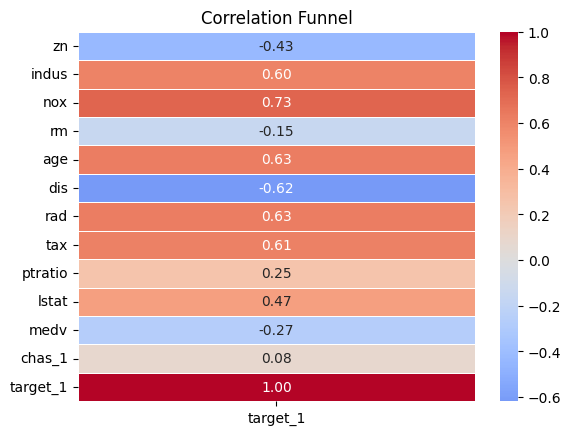

In [7]:
# Binarize the dataframe
train_df_binarized = pd.get_dummies(train_df, drop_first=True)

# Calculate correlations with the target variable
train_df_corr = train_df_binarized.corr()['target_1']

# Plot the correlation funnel
sns.heatmap(train_df_corr.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", center=0, linewidths=0.5)
plt.title('Correlation Funnel')
plt.show()

# Clean up
del train_df_binarized, train_df_corr


The correlation funnel plots the most important features towards the top. In our dataset, the four most important features correlated with the response variable are `tax`, `indus`, `ptratio`, and `nox`.

Looking at the features towards the bottom, the four least important features correlated with the response variable are `medv`, `lstat`, `rm`, and `chas`, with `chas` being the least correlated to `target`. These correlations are measured by the Pearson Correlation coefficient by default.

Since both `chas` and `target` are binary categorical variables, the correct coefficient to use to understand the strength of their relationship is actually the $\phi$ coefficient. If either of these categorical variables had more than two categories, we would need to calculate $\phi$ using the formula for Cramer's V (also called Cramer's $\phi$) coefficient. However, in the special case that both categorical variables are binary, the value of Cramer's V coefficient will actually be equal to the value of the Pearson Correlation coefficient. So either formula actually results in the same value for $\phi$. We prove this below.

In [9]:
from scipy.stats import chi2_contingency
import numpy as np

# Select the specified factors
factors = ["chas", "target"]

# Calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramer's V for the factors
cramersv = cramers_v(train_df['chas'], train_df['target'])

# Calculate Pearson correlation coefficient
pearson = train_df['chas'].corr(train_df['target'], method='pearson')

# Check if Cramer's V equals Pearson correlation coefficient
cramersv == pearson


False

The value for $\phi$ is `r cramersv` regardless of the formula used to calculate it, and this very low value proves the very small amount of correlation between `chas` and `target` estimated by the correlation funnel is accurate.

Now we check for multicollinearity between predictor variables.

<ipython-input-10-d5485a22b486>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.drop(columns=['target']).corr()


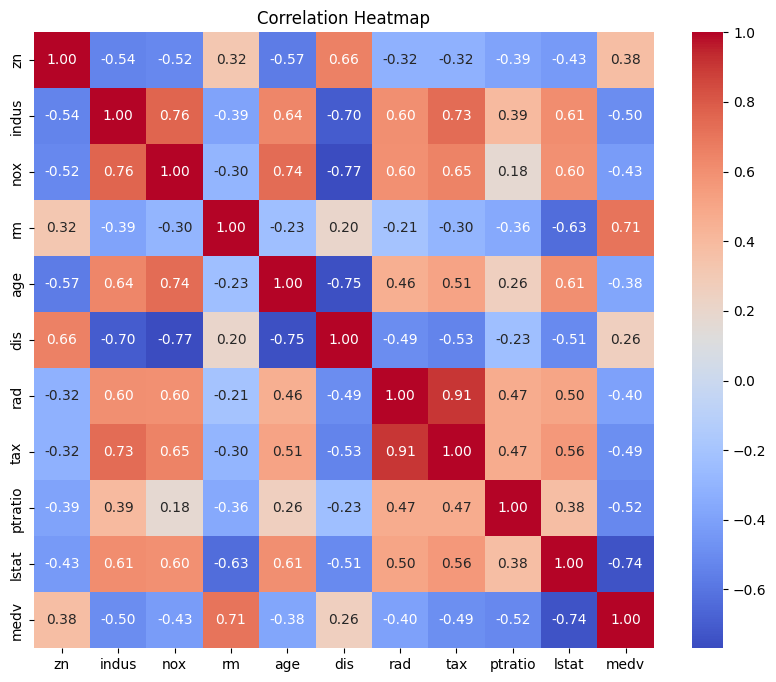

In [10]:
# Calculate the correlation matrix
correlation_matrix = train_df.drop(columns=['target']).corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


It is clear that the predictor variables `rad` and `tax` are very highly correlated (more than 0.9). We will attempt to account for this when we prepare the data.

There are some smaller, but still high correlations between other predictor variables as well. `indus` is highly correlated (more than 0.7) with `nox`, `dis`, and `tax`. `nox` is also highly correlated with `age` and `dis`. `rm` is highly correlated with `medv`. `lstat` is highly correlated with `medv`.

Let's take a look at the distributions for the predictor variables.

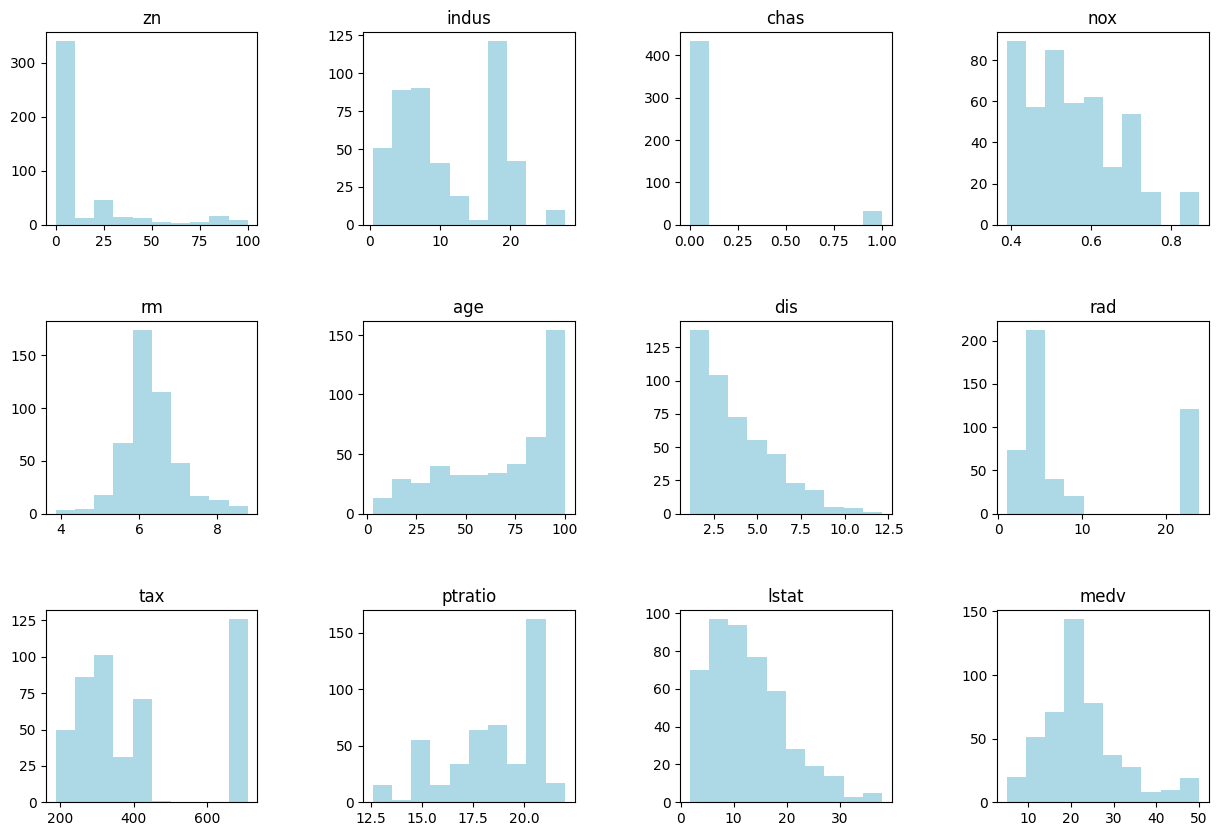

In [11]:
# Set up subplots
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterate over variables
variables = train_df.columns
for i, ax in enumerate(axs.flatten()):
    if i < len(variables) - 1:  # Exclude the target variable
        if variables[i] in factors:
            ax.hist(train_df[variables[i]].astype(float), color='lightblue')
        else:
            ax.hist(train_df[variables[i]], color='lightblue')
        ax.set_title(variables[i])

plt.show()


The distribution for `rm` appears to be normal, and the distribution for `medv` is nearly normal. The distributions for `zn`, `dis`, `lstat`, and `nox` are right-skewed. The distributions for `age` and `ptratio` are left-skewed.

The distributions for the remaining variables are multimodal, including the distribution for `chas`, which appears degenerate at first glance. It looks like a near-zero variance predictor, which we can confirm using the `VarianceThreshold` function from scikit-learn to identify near-zero variance variables and then displays the results in a dataframe.

In [13]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Exclude the target variable and select features
features = train_df.drop(columns=['target'])

# Apply VarianceThreshold to identify near-zero variance variables
selector = VarianceThreshold(threshold=0.01)
selector.fit(features)

# Get the indices of near-zero variance features
near_zero_var_indices = selector.get_support(indices=True)

# Get the names of near-zero variance features
near_zero_var_features = features.columns[near_zero_var_indices]

# Create a dataframe to display the results
nzv_df = pd.DataFrame({'Variable': near_zero_var_features, 'Variance': selector.variances_[near_zero_var_indices]})

# Display the dataframe
print(nzv_df)


   Variable      Variance
0        zn    544.735448
1     indus     46.765159
2      chas      0.065801
3       nox      0.013582
4        rm      0.495749
5       age    800.379229
6       dis      4.429710
7       rad     75.283432
8       tax  28129.945274
9   ptratio      4.815770
10    lstat     50.328618
11     medv     85.188511


Next we analyze boxplots to determine the spread of the numeric predictor variables. This will also reveal any outliers.

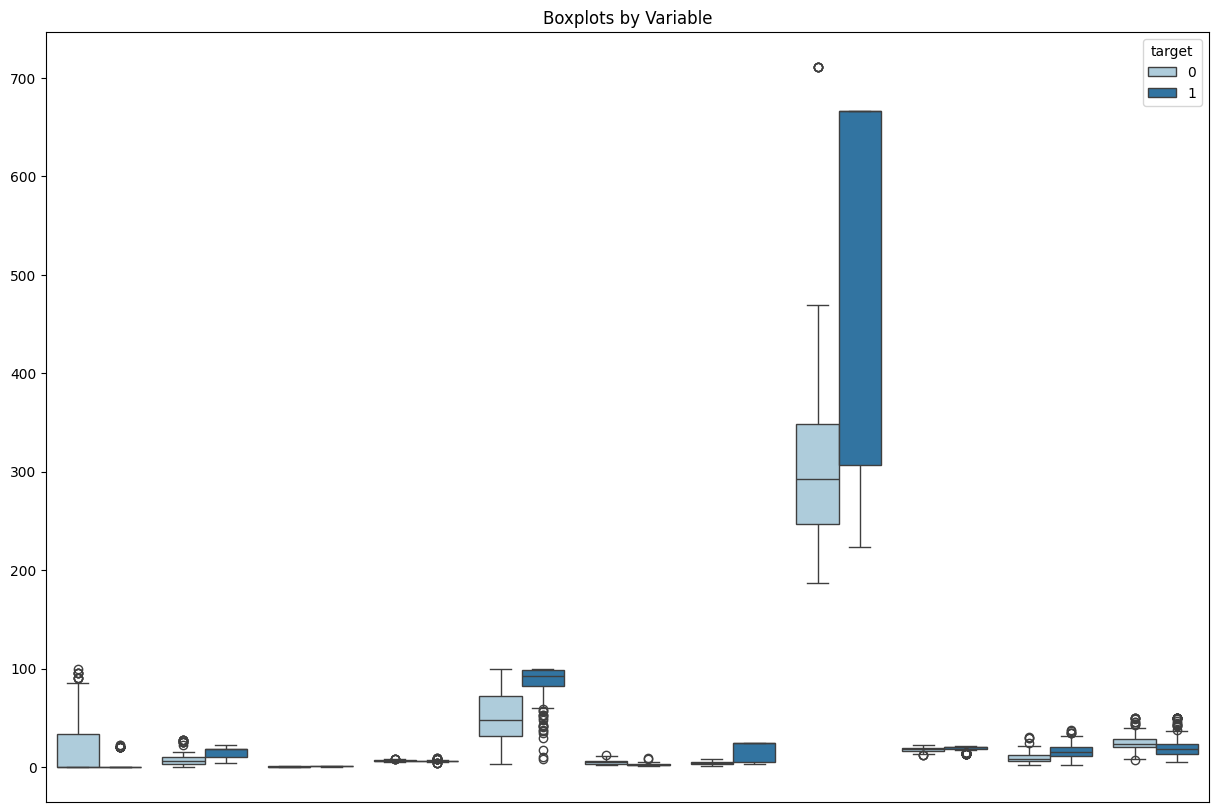

In [15]:
# Exclude the 'chas' column and reshape the dataframe
train_df_melted = train_df.drop(columns=['chas']).melt(id_vars='target')

# Create boxplots using seaborn
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', hue='target', data=train_df_melted, palette='Paired')
plt.xticks([])
plt.xlabel(None)
plt.ylabel(None)
plt.title('Boxplots by Variable')
plt.show()


For certain predictors, the variance between the two categories of the response variable differs largely: `age`, `dis`, `nox`, `rad`, `indus`, and `zn`. Many of these variables also have almost no overlap in the interquartile ranges for each level of the response.

We also see some outliers in one or both levels of the response for some variables. We have no reason to conclude the outliers represent anything other than accurately recorded information that could be important to our model.


### Data Preparation:

We confirmed earlier that there are no missing values to impute and no near-zero variance variables to remove. We also decided against [winsorizing](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0) the outliers, which is a method of outlier imputation that replaces any value of a variable above or below percentile $k$ with the value of the $k^{th}$ percentile itself. (We tested building a model using winsorized data, and it did not result in a model with different predictors or coefficients than building a model with non-winsorized data, so we scrapped it.)

We check whether our predictor variables with skewed distributions would benefit from transformations.


In [18]:
from scipy.stats import boxcox
# Define the skewed variables
skewed = ["zn", "dis", "lstat", "nox", "age", "ptratio"]
adj = ["log", "log", "log", "inverse", "no transformation", "square"]

# Initialize empty lists to store lambdas and alternative transformations
lambdas = []
alternatives = []

# Perform Box-Cox transformation for each skewed variable
for variable in skewed:
    # Add a small constant to columns with any 0 values
    if (train_df[variable] == 0).any():
        train_df[variable] += 0.001

    # Calculate Box-Cox transformation
    transformed, lambda_ = boxcox(train_df[variable])
    lambdas.append(lambda_)

    # Determine alternative transformation based on skewness
    if lambda_ < -0.5:
        alternatives.append('log')
    elif lambda_ < 0.5:
        alternatives.append('no transformation')
    else:
        alternatives.append('square')

# Create a dataframe to display the results
trans_df = pd.DataFrame({'Skewed Variable': skewed,
                         'Ideal Lambda Proposed by Box-Cox': lambdas,
                         'Reasonable Alternative Transformation': alternatives})

# Display the dataframe
print(trans_df)


  Skewed Variable  Ideal Lambda Proposed by Box-Cox  \
0              zn                         -0.300801   
1             dis                         -0.146735   
2           lstat                          0.232792   
3             nox                         -0.949450   
4             age                          1.317674   
5         ptratio                          4.144074   

  Reasonable Alternative Transformation  
0                     no transformation  
1                     no transformation  
2                     no transformation  
3                                   log  
4                                square  
5                                square  


All of the skewed variables except for `age` might benefit from transformations. We also check whether the distributions for these skewed variables in the test set are similar to their distributions in the training set.

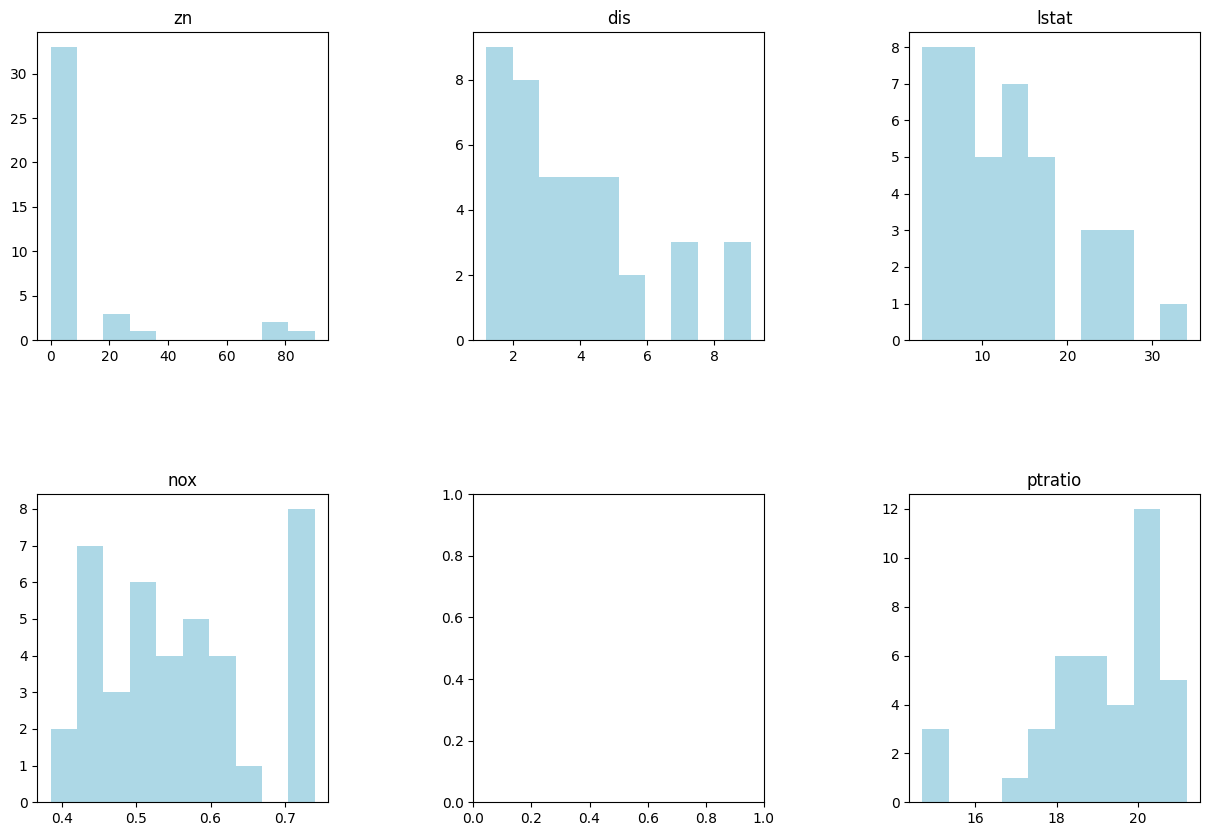

In [19]:
import matplotlib.pyplot as plt

# Set up subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterate over skewed variables
for i, ax in enumerate(axs.flatten()):
    if i < len(skewed):  # Exclude the 'age' variable
        if skewed[i] != "age":
            ax.hist(test_df[skewed[i]], color='lightblue')
            ax.set_title(skewed[i])

plt.show()


The distributions in the test set for these skewed variables are similar to the distributions in the training set, so there are no issues transforming these variables. We now create transformed versions of our train and test data, and we will incorporate these transformed predictors into one of our models in the next section: Model 2.

In [22]:
# Remove specified variables from the training and test data and apply transformations
remove = ["zn", "dis", "lstat", "nox"]
train_df_trans = train_df.drop(columns=remove)
train_df_trans['log_zn'] = np.log(train_df['zn'])
train_df_trans['log_dis'] = np.log(train_df['dis'])
train_df_trans['log_lstat'] = np.log(train_df['lstat'])
train_df_trans['inverse_nox'] = 1 / train_df['nox']
train_df_trans['ptratio_sq'] = train_df['ptratio'] ** 2

test_df_trans = test_df.drop(columns=remove)
test_df_trans['log_zn'] = np.log(test_df['zn'])
test_df_trans['log_dis'] = np.log(test_df['dis'])
test_df_trans['log_lstat'] = np.log(test_df['lstat'])
test_df_trans['inverse_nox'] = 1 / test_df['nox']
test_df_trans['ptratio_sq'] = test_df['ptratio'] ** 2


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


We now consider modifying the `rad` and `tax` variables in an attempt to minimize the very high correlation we identified earlier between these two predictors. First, we look at the `rad` distribution more closely.


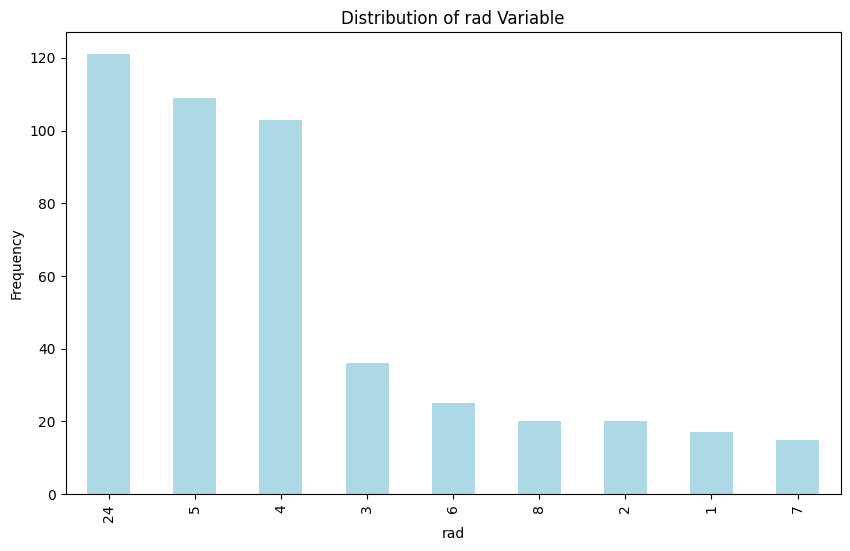

In [23]:
# Create a bar plot for the 'rad' variable
plt.figure(figsize=(10, 6))
train_df['rad'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('rad')
plt.ylabel('Frequency')
plt.title('Distribution of rad Variable')
plt.show()


It is apparent that this variable may be more useful as a dummy variable given the limited potential values for this predictor. We bin the values and create the `rad_less5` dummy variable indicating 1 if the value for `rad` is < 5 and 0 if not. Using the same logic, we also bin the values in the `tax` variable into three levels (low is < 300, middle is 300 to 400, high is 400+), then create two dummy variables: `middle_tax` and `high_tax`.

In [24]:
# Remove specified columns and create new columns based on conditions
remove = ["rad", "tax"]
train_df2 = train_df.drop(columns=remove)
train_df2['rad_less5'] = (train_df['rad'] < 5).astype('int')
train_df2['high_tax'] = (train_df['tax'] > 400).astype('int')
train_df2['middle_tax'] = ((train_df['tax'] < 400) & (train_df['tax'] >= 300)).astype('int')

test_df2 = test_df.drop(columns=remove)
test_df2['rad_less5'] = (test_df['rad'] < 5).astype('int')
test_df2['high_tax'] = (test_df['tax'] > 400).astype('int')
test_df2['middle_tax'] = ((test_df['tax'] < 400) & (test_df['tax'] >= 300)).astype('int')


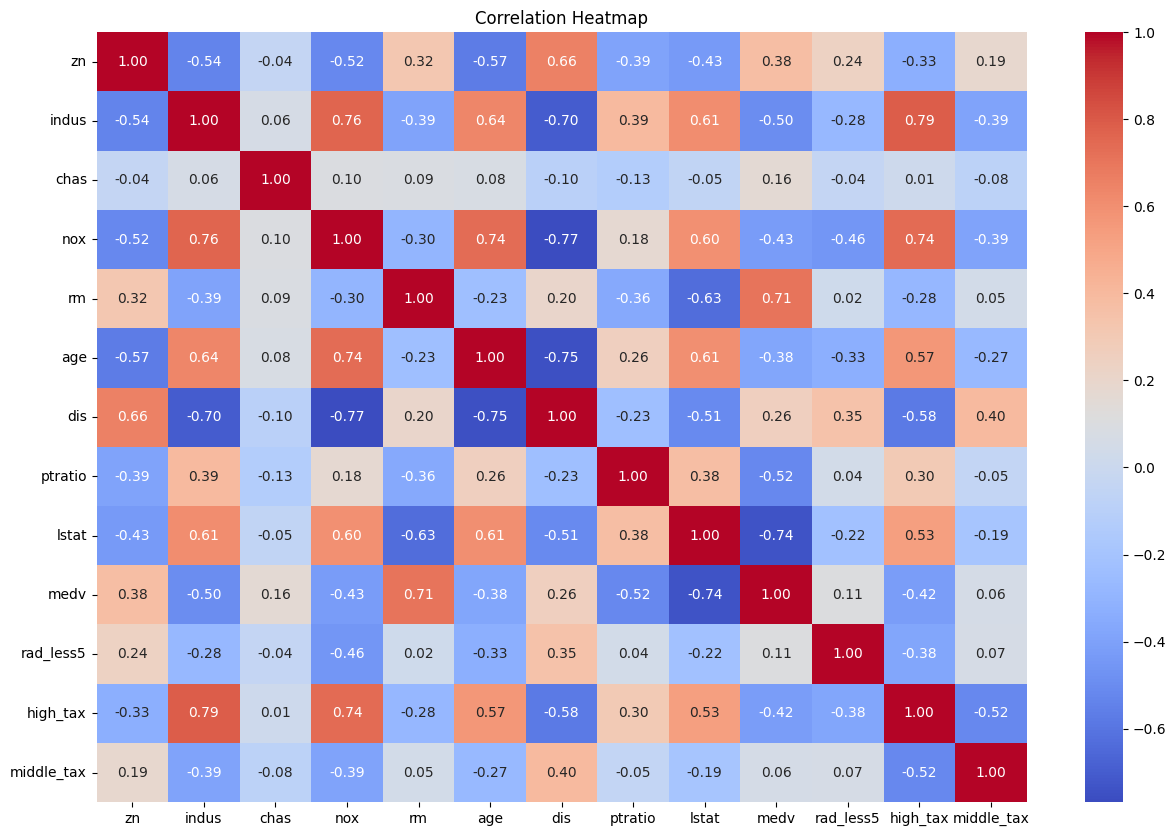

In [26]:

# Select columns and convert to numeric for correlation calculation
corr_df = train_df2.drop(columns=['target']).astype({'chas': 'float', 'rad_less5': 'float', 'high_tax': 'float', 'middle_tax': 'float'})

# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Both binned dummy columns address the correlation concerns that were previously identified. We will attempt to incorporate these binned predictors into one of our models in the next section: Model 3.

Before we build the models in the next section, we have decided that none of the models will be trained on the variable `chas`, as we have deemed this predictor irrelevant based on the earlier conclusion that its correlation with the response variable is very low.

In [27]:
# Remove the 'chas' column from the dataframes
train_df = train_df.drop(columns=['chas'])
train_df_trans = train_df_trans.drop(columns=['chas'])
train_df2 = train_df2.drop(columns=['chas'])
test_df = test_df.drop(columns=['chas'])
test_df_trans = test_df_trans.drop(columns=['chas'])
test_df2 = test_df2.drop(columns=['chas'])


### Build Models

We build three models. Model 1 will be trained using untransformed data, Model 2 will be trained using transformed data for skewed predictors, and Model 3 will be trained using binned data for highly correlated predictors. For Models 1 and 2, stepwise model selection will be used to pick the model with the lowest AIC. For Model 3, an alternative exhaustive search method will be used to pick two sub-models based on different criteria: one with the lowest AIC and one with the lowest BIC.
